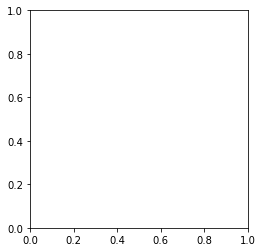

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import networkx as nx
import math

# Networked Distributed Optimization with Exogenous Inputs
Consider an $n$-player network game defined on graph structure $\mathcal{G}=(\mathcal{N},\mathcal{E})$, where $\mathcal{N}=\{1,\ldots,n\}$ are the nodes in the graph---one corresponding to each player---and $$\mathcal{E}=\{(i,j)|\ i,j\in \mathcal{N} \ \text{such that}\ i\  \text{is connected to } j\},$$
is the set of edges.

Each player $i\in \mathcal{N}$ collects data and has objective $F_i(x, \xi_i, \xi)$ where $\xi_i\in \Xi_i$ is a random variable with fixed but unknown probability distribution with domain $\Xi_i$ and similarly, $\xi$ is a random variable with fixed but unknown probability distribution with domain $\Xi$. The random variable $\xi_i$ models local environmental fluctuations such as noise. The random variable $\xi$, on the other hand, models a global information state.

In this simulation, we consider a simple classification problem where the players are given different examples, and they have to develop a model that classifies their examples effectively while coming to a consensus on the best classifier on the whole dataset. Each individual computes the hinge loss for their classifier over their subset of the whole training set. The local $\xi_i$ accounts for the variation in the data that each player observes. The global $\xi$ is a normal random variable that shifts the decision boundary.

# Generate Communication Network

In [2]:
n = 10  # Number of nodes
n_i = 2  # Number of informed nodes

N_i = np.random.choice(n, size=n_i)  # Randomly select n_i informed nodes
N = np.zeros(n, dtype=bool)  # Set of n nodes, initialized to False (uninformed)
N[N_i] = True  # Set informed node indices to True (informed)

G = nx.path_graph(n)  # Generate line graph from the nodes in N

informed_dict = {}  # generate dictionary to add informed status as attribute to each node
for node in G.nodes:
    informed_dict[node] = {'informed': N[node]}  
    
nx.set_node_attributes(G, informed_dict)  # set attributes for each node

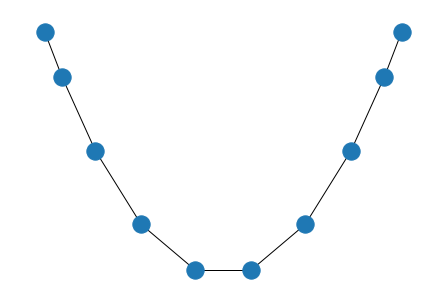

In [3]:
nx.draw_spectral(G)

# Generate Data

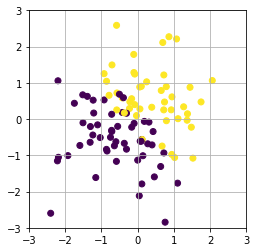

In [40]:
d = 2  # Dimension of the data
m = 100  # Total training examples
m_i = math.ceil(m/n)  # Individual training examples

X = np.random.randn(m,d)
a = np.ones(d) #np.random.randn(d)
a = a/la.norm(a)
eta = 0.2
xi_t = 0.1*np.random.randn(d)
y = np.sign(np.dot(X,a+xi_t)+(eta*np.random.randn(m)))

plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.grid()
plt.gca().set_aspect('equal')
plt.show()